In [1]:
import sys
sys.path.insert(1,'./decoders')
sys.path.insert(1,'./Instances_models')
sys.path.insert(1,'./Evaluators')
from TSP_decoder import TSPDecoder
from TSP_instance import TSPInstance
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import os    
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

burma14 : 3323

In [2]:
instance  = TSPInstance(r'C:\Users\Felipe\Projetos\Generative models optimization\Generative-model-optimization\Instances_data_TSP\burma14.dat')
decoder = TSPDecoder(instance)

In [3]:
tam_pop = 10000

In [9]:
population = torch.rand(tam_pop,instance.num_nodes)
fitness = np.array([],dtype=float)
for i in np.arange(len(population)):
    value = decoder.decode(population[i])
    fitness = np.append(fitness,value)
    

In [10]:
print(len(fitness))
print(fitness[:100])

10000
[6953. 6052. 6390. 5707. 6808. 6278. 7586. 7917. 6365. 5756. 7334. 6964.
 5323. 5879. 6137. 5856. 7655. 6097. 6852. 6545. 6307. 5201. 6890. 6218.
 5437. 7184. 6475. 7147. 7107. 6280. 6552. 7479. 7641. 6106. 8502. 6893.
 7133. 5853. 6444. 6369. 7028. 5901. 8285. 5870. 6043. 5992. 6849. 7247.
 6774. 7214. 6664. 6836. 6381. 6131. 7861. 7851. 7918. 7102. 5901. 7568.
 6928. 7353. 6954. 6807. 6640. 6225. 5883. 5975. 7605. 5637. 6441. 6103.
 6087. 6713. 5808. 6337. 7936. 6130. 7073. 7329. 7646. 6425. 5838. 8016.
 7382. 7641. 5947. 7960. 6982. 7513. 7030. 5948. 7926. 6104. 7515. 6548.
 6452. 6051. 6062. 7486.]


In [11]:
np.savetxt('Initial Populations/chromossoms_1.txt',population, newline='\n',header=f'{len(population)}')
np.savetxt('Initial Populations/fitness_1.txt',fitness, newline='\n',header=f'{len(population)}')

In [ ]:
class FNN(nn.Module)Ç
    def __init__(self,n_input,l1,l2,l3):
        super().__init__()
        self.network = nn.Sequential(
                    nn.Linear(n_input,l1),
                    nn.ReLU()
                    nn.Linear(l1,l2),
                    nn.ReLU()
                    nn.Linear(l2,l3),
                    nn.ReLU()
                    nn.Linear(l3,1)
        )

In [6]:
class VAautoencoder(nn.Module):
    def __init__(self,input_dim,h_dim,z_dim):
        super().__init__()
        #encoder
        self.entrada = nn.Linear(input_dim,h_dim)
        self.sigma = nn.Linear(h_dim,z_dim)
        self.mu = nn.Linear(h_dim,z_dim)

        #decode
        self.z_2hidden = nn.Linear(z_dim,h_dim)
        self.output = nn.Linear(h_dim,input_dim)
        
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
    
    def encode(self,x):
        h = self.relu(self.entrada(x))
        mu = self.mu(h)
        sigma = self.sigma(h)
        return mu ,sigma
    
    def decode(self,z):
        h = self.relu(self.z_2hidden(z))
        output = self.sigmoid(self.output(h))
        return output
    
    def forward(self,x):
        mu,sigma = self.encode(x)
        epsilon = torch.rand_like(sigma)
        z_reparametrizado = mu + sigma*epsilon
        x_reconstruido = self.decode(z_reparametrizado)
        return x_reconstruido,mu,sigma
        

In [7]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
IMPUT_DIM = 14
H_DIM = 10
Z_DIM = 7
NUM_EPOCH = 10
LA_RATE = 3e-4

In [8]:
model = VAautoencoder(IMPUT_DIM,H_DIM,Z_DIM)
optimizer = torch.optim.Adam(model.parameters(),lr=LA_RATE)
loss_func = nn.MSELoss()
loss_per_epoch = np.zeros(NUM_EPOCH)

In [9]:

def train_model(model,optimizer,loss_func,NUM_EPOCH,population,loss_per_epoch):
    for epoch in range(NUM_EPOCH):
        for index, x in enumerate(population):
            
            x_reconstructed, mu, sigma = model(x)
            recons_loss= loss_func(x_reconstructed,x)
            kl_div = -0.5*torch.sum(1 + torch.log(sigma.pow(2)) - mu.pow(2) - sigma.pow(2))
            
            optimizer.zero_grad() 
            loss_val = recons_loss + kl_div
            loss_val.backward()
            optimizer.step()
            
            loss_per_epoch[epoch] = loss_val 
            
            
            
        print(f"Epoch {epoch}, Erro Treino: {loss_per_epoch[epoch]}")
            
            

In [10]:
train_model(model,optimizer,loss_func,NUM_EPOCH,population,loss_per_epoch)

Epoch 0, Erro Treino: 0.11775697767734528
Epoch 1, Erro Treino: 0.08430672436952591
Epoch 2, Erro Treino: 0.07896346598863602
Epoch 3, Erro Treino: 0.08061889559030533
Epoch 4, Erro Treino: 0.07978992909193039
Epoch 5, Erro Treino: 0.07949279248714447
Epoch 6, Erro Treino: 0.08211544156074524
Epoch 7, Erro Treino: 0.08018065989017487
Epoch 8, Erro Treino: 0.08121835440397263
Epoch 9, Erro Treino: 0.08143102377653122


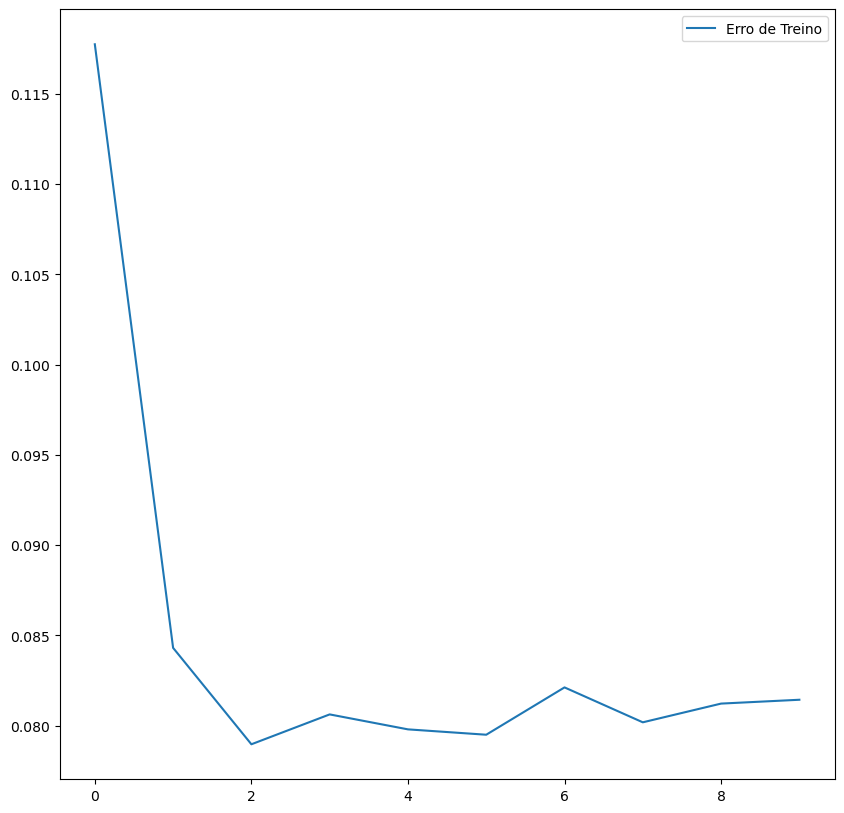

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(loss_per_epoch, label='Erro de Treino')
plt.legend()
plt.show()